In [1]:
import torch
import numpy as np
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel

In [2]:
dataset = load_dataset("jxie/flickr8k")

Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 1162.18it/s]


Dataset parquet downloaded and prepared to /home/gitpod/.cache/huggingface/datasets/jxie___parquet/jxie--flickr8k-3226b79d510846ed/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 494.15it/s]


In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [5]:
img_embeds = torch.tensor(np.load("image_embeds.npy"))
img_embeds.shape

torch.Size([6000, 512])

In [13]:
inputs = processor(["a dog", "a cat"], padding=True, return_tensors="pt")
text_features = model.get_text_features(**inputs)

In [14]:
text_features.shape

torch.Size([2, 512])

In [15]:
image_embeds = img_embeds / img_embeds.norm(p=2, dim=-1, keepdim=True)

In [16]:
text_embeds = text_features / text_features.norm(p=2, dim=-1, keepdim=True)

In [17]:
logit_scale = model.logit_scale.exp()

In [18]:
logits_per_text = torch.matmul(text_embeds, image_embeds.t()) * logit_scale

In [19]:
logits_per_text.shape

torch.Size([2, 6000])

In [21]:
torch.argmax(logits_per_text[0])

tensor(5628)

In [26]:
torch.argmax(logits_per_text[1])

tensor(1236)

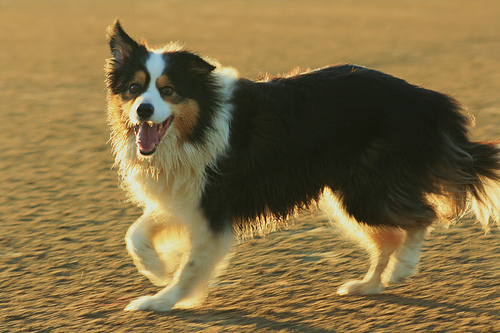

In [25]:
dataset['train'][5628]['image']

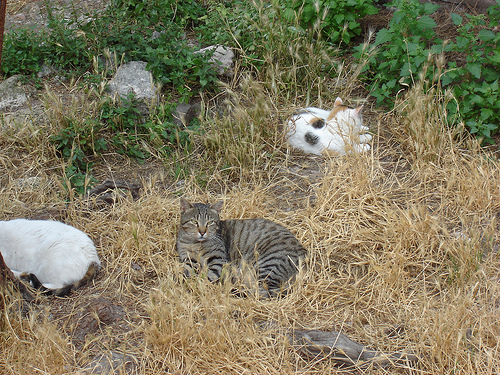

In [27]:
dataset['train'][1236]['image']